
# Graduate Admission

### This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [11]:
# Load the dataset
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

# Display the first few rows of the DataFrame to verify the data
print(df.head())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [13]:
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [7]:
# Drop the column 'Serial No.' if it exists
df = df.drop(columns=['Serial No.'], errors='ignore')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
# Load the dataset
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

# Adjust according to the exact column name
X = df.drop(["Chance of Admit ", "Serial No."], axis=1)
y = df["Chance of Admit "]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2



(0.003704655398788405, 0.8188432567829631)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
10/10 - 2s - 171ms/step - loss: 1090.8586 - mae: 27.4133 - val_loss: 7.2126 - val_mae: 2.6429
Epoch 2/100
10/10 - 0s - 8ms/step - loss: 157.4640 - mae: 11.8235 - val_loss: 183.5241 - val_mae: 13.5419
Epoch 3/100
10/10 - 0s - 6ms/step - loss: 61.7301 - mae: 6.4523 - val_loss: 6.0538 - val_mae: 2.4143
Epoch 4/100
10/10 - 0s - 16ms/step - loss: 25.7951 - mae: 4.9249 - val_loss: 20.4094 - val_mae: 4.4869
Epoch 5/100
10/10 - 0s - 11ms/step - loss: 5.8841 - mae: 1.9776 - val_loss: 4.1472 - val_mae: 2.0033
Epoch 6/100
10/10 - 0s - 6ms/step - loss: 4.6315 - mae: 2.0832 - val_loss: 1.0900 - val_mae: 0.9705
Epoch 7/100
10/10 - 0s - 14ms/step - loss: 0.7327 - mae: 0.7080 - val_loss: 1.2635 - val_mae: 1.0387
Epoch 8/100
10/10 - 0s - 8ms/step - loss: 0.5977 - mae: 0.6337 - val_loss: 0.2342 - val_mae: 0.3742
Epoch 9/100
10/10 - 0s - 6ms/step - loss: 0.3070 - mae: 0.4604 - val_loss: 0.2290 - val_mae: 0.3697
Epoch 10/100
10/10 - 0s - 8ms/step - loss: 0.1820 - mae: 0.3423 - val_loss: 0.1965

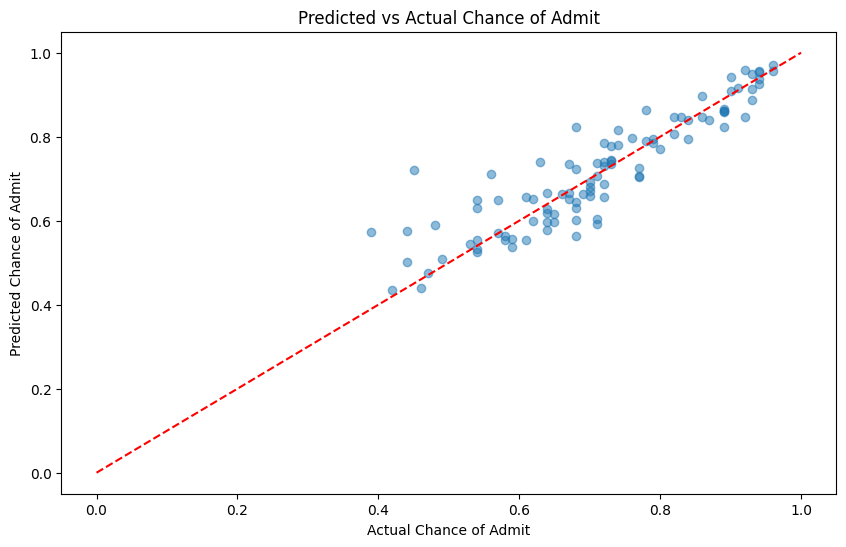

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Predicted vs Actual Chance of Admit')
plt.show()


In [ ]:
# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}')

Actual: 0.9300, Predicted: 0.9146
Actual: 0.8400, Predicted: 0.7952
Actual: 0.3900, Predicted: 0.5727
Actual: 0.7700, Predicted: 0.7074
Actual: 0.7400, Predicted: 0.8159
Actual: 0.8900, Predicted: 0.8621
Actual: 0.4700, Predicted: 0.4746
Actual: 0.5700, Predicted: 0.6485
Actual: 0.6800, Predicted: 0.8238
Actual: 0.8200, Predicted: 0.8074


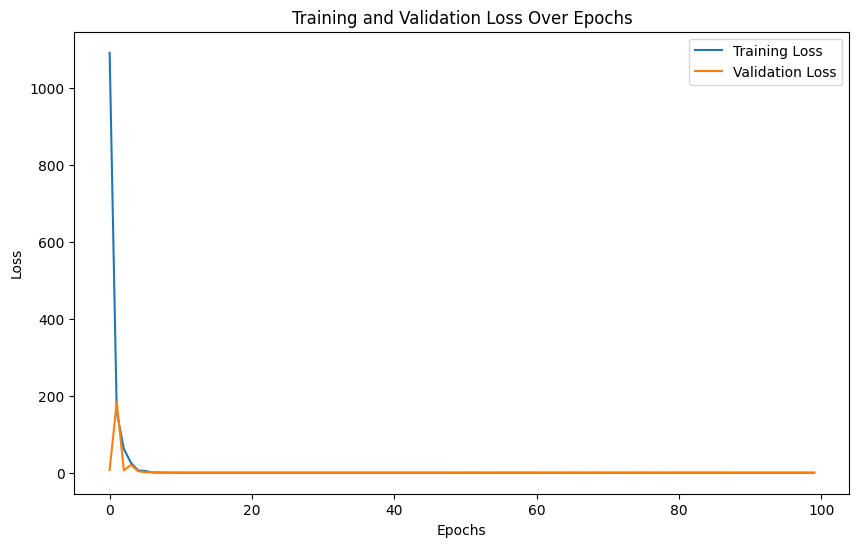

In [ ]:

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()